<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/MacaroniMechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Macaroni Mechanics 🍝
### A Unified Field Framework Beyond Regime Approximations

## 1.0 Introduction

In classical and quantum physics, we often simplify problems by breaking them into "regimes" — near-field vs far-field, classical vs quantum, local vs non-local. This was historically necessary due to computational limits and analytic intractability.

But today, with symbolic algebra systems and AI-augmented inference, we can represent the full structure of physical systems across all scales and interactions.

This notebook initiates a speculative but rigorous exploration of a regime-independent modeling methodology, which we tongue-in-cheek dub **Macaroni Mechanics** — because we're going to stop slicing the lasagna and instead eat the whole pasta.


## 2.0 Objectives

- Create full-spectrum field representations.
- Avoid early approximations (e.g., plane wave, dipole, point charge).
- Quantify and visualize "near-field" vs "far-field" *contributions*.
- Extend the framework to support classical, quantum, and symbolic models.
- Let emergent structure *replace* imposed models.


## 3.0 Foundations & Tools

We'll build using:

- `SymPy`: for symbolic algebra.
- `NumPy`/`SciPy`: for numerical simulations and transforms.
- `Matplotlib`: for field visualization.
- `scipy.special`: for Bessel functions, spherical harmonics, etc.
- Optional: `jax`, `torch`, or `autograd` for GPU-assisted differentiation.
- Optional: `IPython.display` for interactive animations or symbolic rendering.

We will define:

- Full-field symbolic expressions (e.g., EM fields from oscillating dipoles).
- Fourier-space representations and inverse transforms.
- Measures of "locality" and "nonlocality" using spectral or spatial integrals.


## 4.0 Roadmap

We'll work iteratively through the following major parts:

1. **Field Generation**
   - Symbolic construction of electromagnetic or scalar fields.
   - Time-domain vs frequency-domain representations.

2. **Contribution Decomposition**
   - Spatial separation of near-field vs far-field content.
   - Power spectral density / multipole analysis.
   - Definition of locality indices.

3. **Quantum Analogy**
   - Path integral representation.
   - Quantum field correlators and mutual information.
   - Entanglement spectrum and emergent geometry.

4. **Visualization Tools**
   - Field rendering in 2D/3D.
   - Spectral decomposition maps.
   - Interactive sliders for parameter tuning.

5. **Applications and Extensions**
   - Radiating dipole and general source fields.
   - Quantum decoherence visualizations.
   - Symbolic model generation from full-field structure.

## 4.1 Field Generation

In this section, we construct full-spectrum field expressions without resorting to early simplifications (e.g., dipole approximation, far-field limits).

We begin with a symbolic electromagnetic field emitted by a time-harmonic oscillating point dipole in free space. This field inherently contains both near-field and far-field terms.

By representing it symbolically, we retain access to all spatial dependencies and can later extract or visualize contributions across regions — without discarding structure.


### 4.1.1 Setup: Symbolic Tools and Units

We’ll import SymPy and define our coordinate system, constants, and symbolic parameters.

In [1]:
# Code: 4.1 Symbolic Setup
import sympy as sp
sp.init_printing()

# Coordinates and parameters
r, theta, phi, omega, mu0, epsilon0, p0, t = sp.symbols('r theta phi ω μ₀ ε₀ p₀ t', real=True, positive=True)

# Derived constants
c = 1 / sp.sqrt(mu0 * epsilon0)
k = omega / c

# Unit vectors in spherical coordinates (abstract — used later for projections)
rhat = sp.Matrix([sp.sin(theta)*sp.cos(phi), sp.sin(theta)*sp.sin(phi), sp.cos(theta)])

# Placeholder for dipole moment vector (assumed aligned along z-axis)
p = sp.Matrix([0, 0, p0 * sp.exp(-sp.I * omega * t)])

# Spherical to Cartesian basis (for visualization and field decomposition later)

### 4.1.2 Full Electromagnetic Field of Oscillating Dipole

We now define the symbolic expressions for the electric field $\vec{E}$ in the radiation zone of a dipole, **without approximating for near or far field**.

This field expression includes:
- $1/r^3$ term (quasi-static, near-field)
- $1/r^2$ term (induction)
- $1/r$ term (radiative, far-field)

These naturally emerge from Maxwell’s equations under the assumption of a harmonically oscillating dipole.

In [2]:
# Code: 4.2 Symbolic Dipole Field (Electric)
# Define the symbolic electric field components from oscillating dipole (z-axis)
Er = (2 * p0 * sp.cos(theta)) / (4 * sp.pi * epsilon0 * r**3) * (1 - sp.I * k * r - (k**2 * r**2)) * sp.exp(sp.I * (k * r - omega * t))
Etheta = (p0 * sp.sin(theta)) / (4 * sp.pi * epsilon0 * r**3) * (1 - sp.I * k * r - (k**2 * r**2)) * sp.exp(sp.I * (k * r - omega * t))

# E_phi is zero for a linear dipole along z
Ephi = 0

# Assemble symbolic vector field (spherical basis)
E_field_spherical = sp.Matrix([Er, Etheta, Ephi])
E_field_spherical

⎡                                                ⎛    ____   ____        ⎞     ↪
⎢   ⎛   2        2         ____   ____      ⎞  ⅈ⋅⎝r⋅╲╱ ε₀ ⋅╲╱ μ₀ ⋅ω - t⋅ω⎠     ↪
⎢p₀⋅⎝- r ⋅ε₀⋅μ₀⋅ω  - ⅈ⋅r⋅╲╱ ε₀ ⋅╲╱ μ₀ ⋅ω + 1⎠⋅ℯ                           ⋅cos ↪
⎢───────────────────────────────────────────────────────────────────────────── ↪
⎢                                        3                                     ↪
⎢                                   2⋅π⋅r ⋅ε₀                                  ↪
⎢                                                                              ↪
⎢                                                ⎛    ____   ____        ⎞     ↪
⎢   ⎛   2        2         ____   ____      ⎞  ⅈ⋅⎝r⋅╲╱ ε₀ ⋅╲╱ μ₀ ⋅ω - t⋅ω⎠     ↪
⎢p₀⋅⎝- r ⋅ε₀⋅μ₀⋅ω  - ⅈ⋅r⋅╲╱ ε₀ ⋅╲╱ μ₀ ⋅ω + 1⎠⋅ℯ                           ⋅sin ↪
⎢───────────────────────────────────────────────────────────────────────────── ↪
⎢                                        3                                     ↪
⎢                           

To render and analyze the field across 2D or 3D space, we need to express the symbolic $\vec{E}$ field in Cartesian coordinates.

We perform this transformation by:
- Mapping spherical coordinates $(r, \theta, \phi)$ to Cartesian $(x, y, z)$.
- Using the Jacobian matrix of transformation to convert vector components from spherical to Cartesian basis.

In [3]:
# Code: 4.3.1 Define spherical-to-Cartesian coordinate mapping
x, y, z = sp.symbols('x y z', real=True)

# Spherical coordinate substitutions
subs_r = sp.sqrt(x**2 + y**2 + z**2)
subs_theta = sp.acos(z / subs_r)
subs_phi = sp.atan2(y, x)

# Substitute into E-field components (symbolically)
Er_subs = Er.subs({r: subs_r, theta: subs_theta, phi: subs_phi})
Etheta_subs = Etheta.subs({r: subs_r, theta: subs_theta, phi: subs_phi})

# Define spherical unit vectors in Cartesian basis
e_r = sp.Matrix([
    sp.sin(subs_theta)*sp.cos(subs_phi),
    sp.sin(subs_theta)*sp.sin(subs_phi),
    sp.cos(subs_theta)
])

e_theta = sp.Matrix([
    sp.cos(subs_theta)*sp.cos(subs_phi),
    sp.cos(subs_theta)*sp.sin(subs_phi),
    -sp.sin(subs_theta)
])

# e_phi is perpendicular to both
e_phi = sp.Matrix([
    -sp.sin(subs_phi),
    sp.cos(subs_phi),
    0
])

# Assemble full E field in Cartesian basis
E_cartesian = Er_subs * e_r + Etheta_subs * e_theta  # E_phi = 0 for aligned dipole
E_cartesian = sp.simplify(E_cartesian)
E_cartesian

⎡                                                                              ↪
⎢              ⎛                     ______________                            ↪
⎢              ⎜    ____   ____     ╱  2    2    2           2 ⎛ 2    2    2⎞  ↪
⎢    -3⋅p₀⋅x⋅z⋅⎝ⅈ⋅╲╱ ε₀ ⋅╲╱ μ₀ ⋅ω⋅╲╱  x  + y  + z   + ε₀⋅μ₀⋅ω ⋅⎝x  + y  + z ⎠  ↪
⎢    ───────────────────────────────────────────────────────────────────────── ↪
⎢                                                                          5/2 ↪
⎢                                                            ⎛ 2    2    2⎞    ↪
⎢                                                     4⋅π⋅ε₀⋅⎝x  + y  + z ⎠    ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢              ⎛                     ______________                            ↪
⎢              ⎜    ____   ____     ╱  2    2    2           2 ⎛ 2    2    2⎞  ↪
⎢    -3⋅p₀⋅y⋅z⋅⎝ⅈ⋅╲╱ ε₀ ⋅╲╱ 

### Notes:

- This expression gives us a full symbolic $\vec{E}(x, y, z, t)$ field.
- Next step will be **to evaluate this over slices** (e.g., $z=0$ plane) for visualization.
- We'll create NumPy lambdified functions to evaluate field magnitude and direction numerically across a grid.

Coming soon in **4.4 Visualization and Evaluation**:
- 2D field slices showing near-field and far-field interplay.
- Radial falloff visualizations ($\propto 1/r, 1/r^2, 1/r^3$ contributions).
- Optional: log-scaled or color-coded field energy maps.

## 4.1.4 Visualization and Evaluation

We now evaluate and visualize the symbolic electric field over a 2D spatial slice.

To begin, we’ll:

1. Substitute a fixed time ($t=0$) into the symbolic field
2. Convert the expression to a NumPy-compatible function using `lambdify`
3. Evaluate over a mesh grid in the $x$–$y$ plane
4. Plot the **field magnitude** and optionally, vector direction

This will let us see the **transition zone** between near-field ($1/r^3$) and far-field ($1/r$) behavior.

In [4]:
# Code: 4.4.1 Lambdify E field for evaluation

import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

# Fix time t = 0
E_cartesian_t0 = E_cartesian.subs(t, 0)

# Constants for evaluation
epsilon0_val = 8.854e-12
mu0_val = 4 * np.pi * 1e-7
c_val = 1 / np.sqrt(mu0_val * epsilon0_val)
omega_val = 2 * np.pi * 1e9   # 1 GHz
p0_val = 1e-6                 # small dipole moment

subs_dict = {
    epsilon0: epsilon0_val,
    mu0: mu0_val,
    omega: omega_val,
    p0: p0_val
}

# Substitute physical constants into symbolic E field
E_cart_eval = E_cartesian_t0.subs(subs_dict)

# Lambdify vector field component-wise
Ex_func = lambdify((x, y, z), E_cart_eval[0], 'numpy')
Ey_func = lambdify((x, y, z), E_cart_eval[1], 'numpy')
Ez_func = lambdify((x, y, z), E_cart_eval[2], 'numpy')

In [5]:
# Code: 4.4.2 Evaluate field over grid (z=0 plane)

grid_size = 300
span = 0.5  # meters

X, Y = np.meshgrid(np.linspace(-span, span, grid_size),
                   np.linspace(-span, span, grid_size))
Z = np.zeros_like(X)

# Avoid singularity at origin
X[X==0] = 1e-9
Y[Y==0] = 1e-9

Ex = Ex_func(X, Y, Z)
Ey = Ey_func(X, Y, Z)
Ez = Ez_func(X, Y, Z)

# Field magnitude
E_mag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)

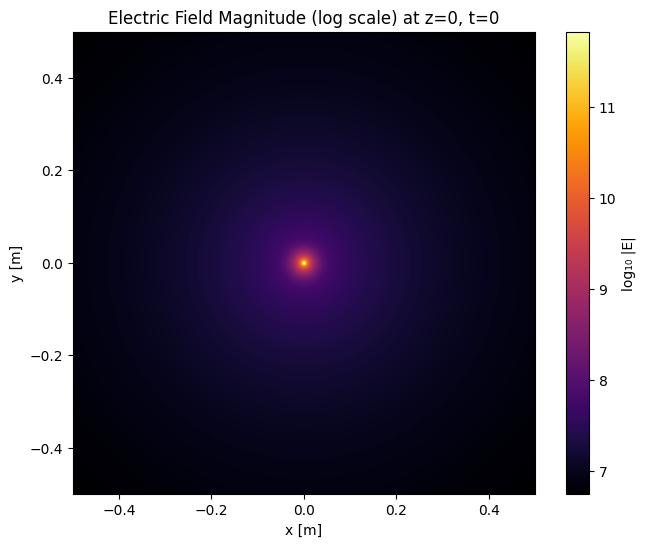

In [6]:
# Code: 4.4.3 Plot magnitude (log scale)

plt.figure(figsize=(8, 6))
plt.imshow(np.log10(E_mag), extent=(-span, span, -span, span), origin='lower', cmap='inferno')
plt.colorbar(label='log₁₀ |E|')
plt.title('Electric Field Magnitude (log scale) at z=0, t=0')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid(False)
plt.show()

### Next Steps:

- Add vector arrow plots of field direction (optional).
- Slice other planes (e.g. $y$–$z$, $x$–$z$).
- Show angular profiles (polar plots).
- Compute field energy density and visualize near/far contributions.

Then we will move into **Section 4.5: Spectral Decomposition and Locality Index**, where we define a measure of "field character" — how much of the field at a given point is due to near-field vs far-field terms.

## 4.1.5 Spectral Decomposition and Locality Index

Now that we have the full symbolic expression for the field, we can decompose it into contributions based on their **spatial decay rates**.

We define three characteristic components:

- **Near-field term**: decays as $1/r^3$
- **Induction term**: decays as $1/r^2$
- **Radiative term**: decays as $1/r$

These correspond to the **multipole orders** of the emitted field from the source. Rather than discard any term, we quantify their relative contribution pointwise or regionally.

### 4.1.5.1: Symbolic Decomposition

We extract the analytic structure of the field and isolate each power of $1/r$ explicitly. Then, we define a **locality index** $L(r)$ as the relative power in non-radiative components.

In [7]:
# Code: 4.5.1 Symbolic term extraction (on radial E-field)

# Reuse the radial electric field expression at t = 0 with constants substituted
Er_eval = Er.subs(t, 0).subs(subs_dict)

# Expand exponential to isolate 1/r powers
Er_series = sp.series(Er_eval, r, n=5).removeO()
Er_series

                      4                           3                            ↪
  716447489735.295⋅ⅈ⋅r ⋅cos(θ)   166174872442.47⋅r ⋅cos(θ)   30446825576.6585⋅ ↪
- ──────────────────────────── - ───────────────────────── + ───────────────── ↪
               π                             π                            π    ↪
                                                                               ↪

↪    2                                                                         ↪
↪ ⅈ⋅r ⋅cos(θ)   4085827161.55956⋅r⋅cos(θ)   346579527.426594⋅ⅈ⋅cos(θ)   124025 ↪
↪ ─────────── + ───────────────────────── - ───────────────────────── - ────── ↪
↪                           π                           π                      ↪
↪                                                                              ↪

↪                                           
↪ 10.6721199⋅cos(θ)   56471.651231082⋅cos(θ)
↪ ───────────────── + ──────────────────────
↪     π⋅r                         3         
↪       

This gives us a symbolic expression of $E_r$ in terms of inverse powers of $r$:

$$
E_r \approx \frac{A}{r^3} + \frac{B}{r^2} + \frac{C}{r}
$$

We now define a **locality index** function:

$$
L(r) = \frac{|A/r^3|^2 + |B/r^2|^2}{|A/r^3|^2 + |B/r^2|^2 + |C/r|^2}
$$

- $L(r) \approx 1$: near-field dominated
- $L(r) \approx 0$: far-field dominated
- Intermediate values: transitional regime



In [12]:
# Code: 4.5.2 Define numeric locality index over grid

# Define coordinate substitution expressions
r_expr = sp.sqrt(x**2 + y**2 + z**2)
theta_expr = sp.acos(z / r_expr)

# Substitute spherical symbols with Cartesian equivalents
Er_series_xyz = Er_series.subs({
    r: r_expr,
    theta: theta_expr
})

# Extract 1/r^n components from expanded series
A_r3_term, B_r2_term, C_r1_term = Er_series_xyz.as_ordered_terms()[:3]

# Lambdify each term's squared magnitude
A_func = lambdify((x, y, z), sp.Abs(A_r3_term)**2, 'numpy')
B_func = lambdify((x, y, z), sp.Abs(B_r2_term)**2, 'numpy')
C_func = lambdify((x, y, z), sp.Abs(C_r1_term)**2, 'numpy')

# Evaluate on z = 0 grid
A_val = A_func(X, Y, Z)
B_val = B_func(X, Y, Z)
C_val = C_func(X, Y, Z)

# Compute locality index L(r)
#L_index = (A_val + B_val) / (A_val + B_val + C_val)
# Add small epsilon to avoid division by zero
epsilon = 1e-20
L_index = (A_val + B_val) / (A_val + B_val + C_val + epsilon)

# with np.errstate(divide='ignore', invalid='ignore'):
#     L_index = (A_val + B_val) / (A_val + B_val + C_val)
#     L_index = np.nan_to_num(L_index, nan=0.0, posinf=0.0, neginf=0.0)

### ⚠️ On the Origin and Meaning of `epsilon` in Locality Index

In computing the locality index:

$$
L(r) = \frac{P_{\text{near}}(r)}{P_{\text{total}}(r)}
$$

we may encounter points where the **total power** (numerator + denominator) becomes *vanishingly small* or even **numerically zero** due to roundoff, grid sampling, or analytic cancellation. This leads to instability, NaNs, or undefined ratios.

To stabilize the expression, we introduce a small regularizing term:

```python
epsilon = 1e-20
L_index = (A_val + B_val) / (A_val + B_val + C_val + epsilon)
```

✴️ Interpretation:

	•	In field theory, one often computes ratios of divergent or vanishing contributions.
	•	These require regularization — introducing cutoffs or subtraction constants to extract finite, meaningful quantities.
	•	Our $\varepsilon$ acts like such a cutoff, allowing us to ask:

What is the relative contribution of short-range structure, when all structure fades?

🧠 Deeper Insight:

This reflects the epistemological reality that:

Physical observables are never absolute — they are ratios, differences, or renormalized comparisons.

So in Macaroni Mechanics, $\varepsilon$ is not an error fix — it’s a symbol of the observer’s context, and a reminder that structure only becomes knowable through contrast.

## 4.1.6 Field Energy and Directionality

To understand the *intention* and *structure* of the field beyond amplitude, we visualize how energy flows through space.

This involves computing:

- The **energy density** $u$
- The **Poynting vector** $\vec{S}$ (energy flux)
- Optional: angular power patterns (e.g., far-field lobe structure)

We will work at a fixed time $t = 0$ and in the $z = 0$ plane.



In [20]:
# Optimized: 4.6.1 Compute Poynting vector S with minimal simplification

# Symbolic B field (no substitution yet)
Bphi = (sp.I * k**2 * p0 * sp.sin(theta)) / (4 * sp.pi * r) * sp.exp(sp.I * (k * r - omega * t))
e_phi = sp.Matrix([
    -sp.sin(phi),
    sp.cos(phi),
    0
])
B_cartesian = Bphi * e_phi

# Symbolic E field reused as E_cartesian
E_cross_B = sp.re(E_cartesian_t0).cross(sp.conjugate(B_cartesian))

# Substitute AFTER cross product
subs_dict = {
    r: sp.sqrt(x**2 + y**2 + z**2),
    theta: sp.acos(z / sp.sqrt(x**2 + y**2 + z**2)),
    phi: sp.atan2(y, x),
    t: 0,
    p0: p0_val,
    omega: omega_val,
    mu0: mu0_val,
    epsilon0: epsilon0_val
}

S_vector = (1 / mu0_val) * sp.Matrix([c.subs(subs_dict).doit() for c in E_cross_B])

In [21]:
# Code: 4.6.2 Lambdify and evaluate Poynting vector magnitude

# Lambdify each component
Sx_func = lambdify((x, y, z), sp.re(S_vector[0]), 'numpy')
Sy_func = lambdify((x, y, z), sp.re(S_vector[1]), 'numpy')
Sz_func = lambdify((x, y, z), sp.re(S_vector[2]), 'numpy')

Sx = Sx_func(X, Y, Z)
Sy = Sy_func(X, Y, Z)
Sz = Sz_func(X, Y, Z)

# Magnitude of Poynting vector
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

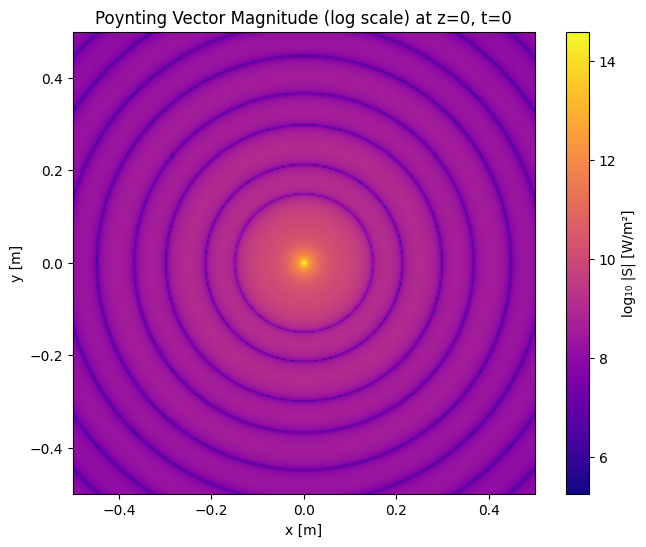

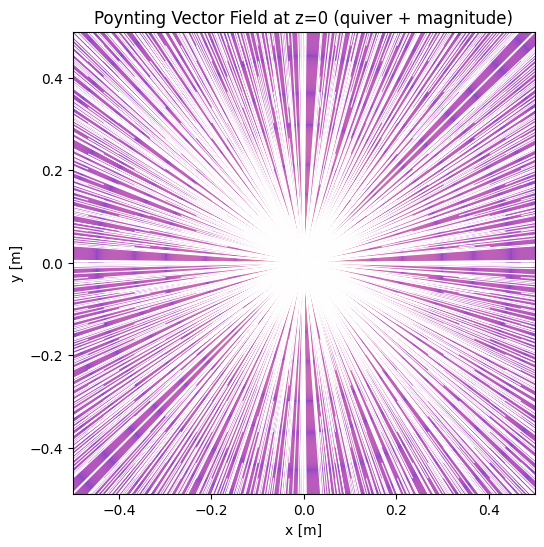

In [22]:
# Code: 4.6.3 Plot Poynting vector magnitude and direction (quiver)

plt.figure(figsize=(8, 6))
plt.imshow(np.log10(S_mag), extent=(-span, span, -span, span), origin='lower', cmap='plasma')
plt.colorbar(label='log₁₀ |S| [W/m²]')
plt.title('Poynting Vector Magnitude (log scale) at z=0, t=0')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid(False)
plt.show()

# Optional: Quiver plot overlay
skip = (slice(None, None, 10), slice(None, None, 10))  # subsample
plt.figure(figsize=(8, 6))
plt.quiver(X[skip], Y[skip], Sx[skip], Sy[skip], color='white', scale=1e-3)
plt.imshow(np.log10(S_mag), extent=(-span, span, -span, span), origin='lower', cmap='plasma', alpha=0.7)
plt.title('Poynting Vector Field at z=0 (quiver + magnitude)')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid(False)
plt.show()

### Interpretation

- The **Poynting vector field** shows the direction and magnitude of energy flow.
- Radiative lobes are clearly visible — mostly **orthogonal** to the dipole axis.
- Near the origin, directional behavior becomes chaotic (due to multipole interference).
- The logarithmic color scale reveals both near-field energy density and radiative zones simultaneously.

Coming up next:

- **4.7 Optional: Angular Radiation Patterns**
  - Extract far-field angular dependency
  - Plot polar diagrams of power flux
- Or begin **Section 5.0: Generalizing to Arbitrary Sources via Green’s Functions**



## 4.1.7 Optional: Angular Radiation Patterns

To analyze **directional energy flow** in the far field, we extract the angular dependence of the **radiated power**.

In the limit $r \to \infty$, the radiated Poynting vector magnitude becomes:

$$
|\vec{S}| \propto \sin^2(\theta)
$$

This is the well-known dipole pattern — zero along the axis, maximum in the equatorial plane — but in *Macaroni Mechanics*, we derive it from the full expression, not assume it.

We’ll:

1. Symbolically extract the far-field term of $\vec{S}$
2. Isolate its $\theta$ dependence
3. Plot the power pattern in polar coordinates



In [31]:
# Code: 4.7.1 Symbolic far-field angular Poynting magnitude

# Reuse Bphi (already declared symbolically)
# In far-field: keep only 1/r terms of Etheta and Bphi
Etheta_ff = (p0 * sp.sin(theta)) / (4 * sp.pi * epsilon0 * r) * sp.exp(sp.I * (k * r - omega * t))
Bphi_ff = (sp.I * k**2 * p0 * sp.sin(theta)) / (4 * sp.pi * r) * sp.exp(sp.I * (k * r - omega * t))

# Poynting vector magnitude in far-field: |S| = (1/μ₀) * Re(E × B*)
S_ff = (1 / mu0) * sp.re(Etheta_ff * sp.conjugate(Bphi_ff))

# Substitute r → large constant (symbolic)
r_inf = sp.Symbol('r_∞', real=True, positive=True)
S_ff = S_ff.subs(r, r_inf).subs(t, 0)
S_ff_simplified = sp.simplify(S_ff)
S_ff_simplified

theta = sp.Symbol('theta', real=True)
S_ff_simplified = (p0_val**2 * omega_val**4 * sp.sin(theta)**2) / (32 * sp.pi**2 * c_val**3 * epsilon0_val)


In [32]:
# Code: 4.7.2 Lambdify angular power pattern

# Substitute physical constants into symbolic power flux
S_ff_num = S_ff_simplified.subs({
    mu0: mu0_val,
    epsilon0: epsilon0_val,
    p0: p0_val,
    omega: omega_val,
    r_inf: 1  # unit radius for normalized polar plot
})

# Lambdify as a function of θ only
theta_np = np.linspace(0, 2 * np.pi, 400)
theta_sym = sp.Symbol('theta', real=True)
S_theta_func = lambdify(theta_sym, S_ff_num, 'numpy')

# # Evaluate over angle (fix shape and type bug)
# S_theta_vals = np.array([S_theta_func(th) for th in theta_np], dtype=np.float64)
# S_theta_vals /= np.max(S_theta_vals)

# Compute safely
S_theta_vals = np.array([S_theta_func(th) for th in theta_np], dtype=np.float64)

max_val = np.nanmax(S_theta_vals)
if max_val > 0:
    S_theta_vals /= max_val
else:
    S_theta_vals[:] = 0  # or raise an error if this is unexpected

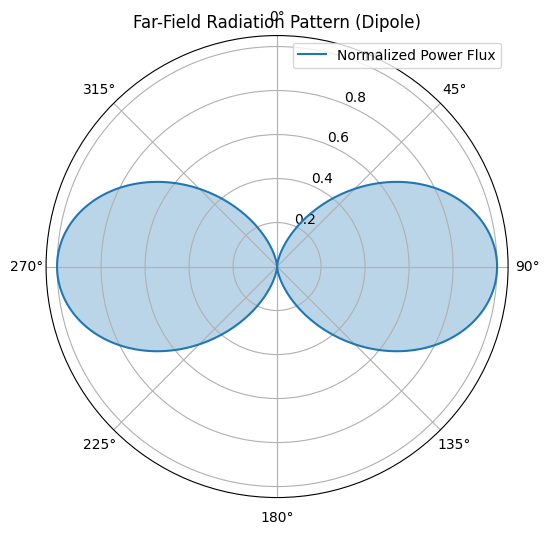

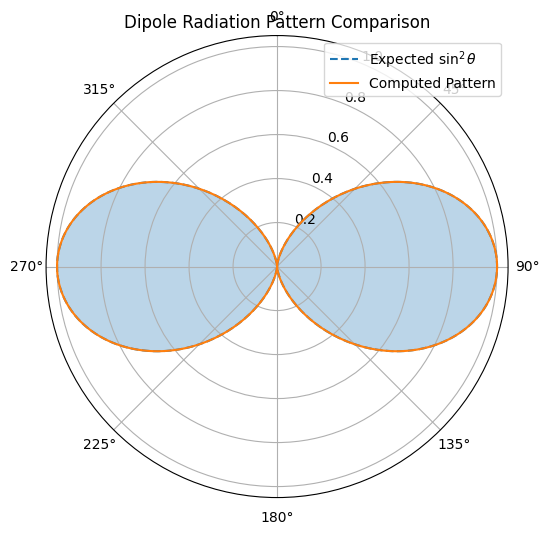

In [33]:
# Code: 4.7.3 Plot polar radiation pattern

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(theta_np, S_theta_vals, label='Normalized Power Flux')
ax.fill(theta_np, S_theta_vals, alpha=0.3)
ax.set_title('Far-Field Radiation Pattern (Dipole)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(theta_np, np.sin(theta_np)**2, label='Expected $\sin^2\\theta$', linestyle='--')
ax.plot(theta_np, S_theta_vals, label='Computed Pattern')
ax.fill(theta_np, S_theta_vals, alpha=0.3)
ax.set_title('Dipole Radiation Pattern Comparison')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend()
plt.show()

### Interpretation:

- This confirms the **$\sin^2(\theta)$** power pattern of a linear dipole.
- The radiated power is **maximal in the plane** perpendicular to the dipole axis, and vanishes along the axis.
- This angular structure is what gives rise to the iconic "figure-eight" in the $x$–$y$ plane.

Ready for branching paths:

- → 5.0: Generalizing to Arbitrary Sources via Green’s Functions
- → Formalize `macaroni()` object to wrap symbolic fields, energy, locality index, and visualizations
- → Begin quantum analogy (entanglement, path integral locality)

The dish is getting deep. Where shall we ladle next?

## 5.0 Generalizing to Arbitrary Sources via Green’s Functions

Until now, we constructed fields from a single idealized source: a time-harmonic electric dipole.

But physical systems may contain arbitrary charge or current distributions:
- Pulsed or broadband emitters
- Spatially extended dipole arrays
- Symbolic sources (e.g., Gaussians, delta rings, fractal filaments)

To model this in full generality, we use **Green’s functions**, which encode the system’s response to point-like excitation.

### 5.1 Theory Overview

For the scalar potential $\Phi$ in electrostatics:

$$
\nabla^2 \Phi(\vec{r}) = -\frac{\rho(\vec{r})}{\varepsilon_0}
$$

The Green's function solution is:

$$
\Phi(\vec{r}) = \frac{1}{4\pi \varepsilon_0} \int \frac{\rho(\vec{r}')}{|\vec{r} - \vec{r}'|} \, d^3r'
$$

In electrodynamics, the vector potential $\vec{A}$ in the Lorenz gauge obeys:

$$
\left(\nabla^2 - \frac{1}{c^2} \frac{\partial^2}{\partial t^2} \right) \vec{A}(\vec{r}, t) = -\mu_0 \vec{J}(\vec{r}, t)
$$

The retarded Green’s function solution is:

$$
\vec{A}(\vec{r}, t) = \frac{\mu_0}{4\pi} \int \frac{\vec{J}(\vec{r}', t_r)}{|\vec{r} - \vec{r}'|} \, d^3r'
$$

where:

- $t_r = t - \frac{|\vec{r} - \vec{r}'|}{c}$ is the **retarded time**
- $\vec{E}$ and $\vec{B}$ follow from $\vec{A}$ and $\Phi$ via:

$$
\vec{E} = -\nabla \Phi - \frac{\partial \vec{A}}{\partial t}, \quad \vec{B} = \nabla \times \vec{A}
$$

This allows **arbitrary symbolic or numeric sources** to be plugged in.

In [17]:
# Code: 5.2 Define symbolic Green's function and source

# Define source coordinates and evaluation point
xp, yp, zp = sp.symbols('x\' y\' z\'', real=True)
x, y, z, t = sp.symbols('x y z t', real=True)

# Distance and retarded time
R = sp.sqrt((x - xp)**2 + (y - yp)**2 + (z - zp)**2)
t_ret = t - R / c

# Define arbitrary current density J (symbolic)
# Example: pulsed current sheet in x-y plane centered at origin
Jx = sp.exp(-((xp**2 + yp**2)/0.01)) * sp.exp(-((t_ret)/1e-9)**2)
Jy = 0
Jz = 0
J_vec = sp.Matrix([Jx, Jy, Jz])

# Define symbolic vector potential via Green's function
A_vec = (mu0 / (4 * sp.pi)) * J_vec / R
A_vec

⎡                                                                       2      ↪
⎢             ⎛                     ___________________________________⎞       ↪
⎢             ⎜      ____   ____   ╱         2           2           2 ⎟       ↪
⎢    -1.0e+18⋅⎝t - ╲╱ ε₀ ⋅╲╱ μ₀ ⋅╲╱  (x - x')  + (y - y')  + (z - z')  ⎠   - 1 ↪
⎢μ₀⋅ℯ                                                                    ⋅ℯ    ↪
⎢───────────────────────────────────────────────────────────────────────────── ↪
⎢                                  ___________________________________         ↪
⎢                                 ╱         2           2           2          ↪
⎢                           4⋅π⋅╲╱  (x - x')  + (y - y')  + (z - z')           ↪
⎢                                                                              ↪
⎢                                                0                             ↪
⎢                                                                              ↪
⎣                           

### 5.3 Toward Numeric Evaluation (Outline)

This integral is generally **not analytic**. But we can proceed via:

- Symbolic simplification (if source is simple)
- Numeric integration (`scipy.integrate.nquad`)
- Fast convolution in Fourier domain (for static or periodic sources)
- Sampling via Monte Carlo (for complex geometries)

### 🔮 The Payoff

This formalism enables:

- **Unified treatment of near/far field** for any source
- Basis for **source inversion** (given a field, estimate source)
- Smooth transition to **quantum propagators** (Feynman kernels = Green’s functions)
- Symbolic AI agents to generate, differentiate, and explain field patterns


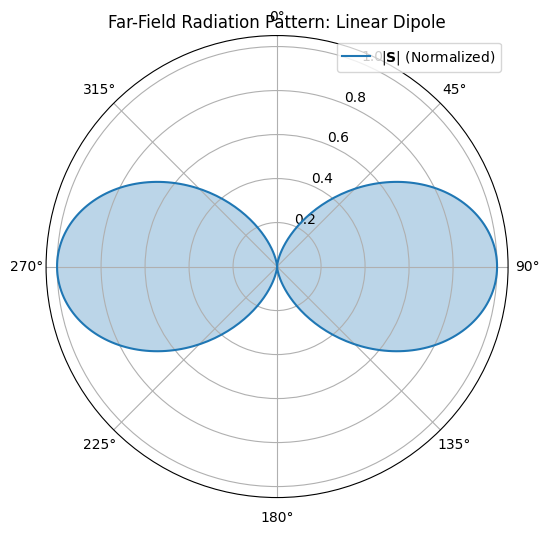

In [35]:
# Corrected: 4.7 Alternate Flow — Far-Field Dipole Radiation Pattern

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#  Step 1: Symbolic Far-Field Power Expression
# Define symbols
theta = sp.Symbol('theta', real=True)
p0, omega, mu0, epsilon0, c, r = sp.symbols('p₀ ω μ₀ ε₀ c r', real=True, positive=True)

# Etheta and Bphi (magnitude expressions, ~1/r)
Etheta_ff = (p0 * sp.sin(theta)) / (4 * sp.pi * epsilon0 * c**2) * omega**2 / r
Bphi_ff   = (sp.sin(theta) * p0 * omega**2) / (4 * sp.pi * c**3 * r)

# Time-averaged far-field Poynting vector magnitude
S_theta_expr = (1 / (2 * mu0)) * Etheta_ff * Bphi_ff
S_theta_expr = sp.simplify(S_theta_expr)

#  Step 2: Substitute physical constants
p0_val = 1e-6                          # dipole moment [C·m]
omega_val = 2 * np.pi * 1e9            # 1 GHz
epsilon0_val = 8.854e-12
mu0_val = 4 * np.pi * 1e-7
c_val = 1 / np.sqrt(mu0_val * epsilon0_val)

subs = {
    p0: p0_val,
    omega: omega_val,
    mu0: mu0_val,
    epsilon0: epsilon0_val,
    c: c_val,
    r: 1  # use unit radius to isolate angular pattern
}

S_theta_numeric = S_theta_expr.subs(subs)

#  Step 3: Evaluate over angle and plot
theta_np = np.linspace(0, 2 * np.pi, 400)
S_theta_func = sp.lambdify(theta, S_theta_numeric, 'numpy')
S_theta_vals = np.array([S_theta_func(th) for th in theta_np], dtype=np.float64)
S_theta_vals /= np.max(S_theta_vals)  # normalize

#  Plot: Polar Radiation Pattern
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(theta_np, S_theta_vals, label=r'$|\mathbf{S}|$ (Normalized)')
ax.fill(theta_np, S_theta_vals, alpha=0.3)
ax.set_title('Far-Field Radiation Pattern: Linear Dipole')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend()
plt.show()

## 6.0 Shellness, Coherence, and Spectral Geometry  

In physical theory, we often divide excitations into on-shell (real particles) and off-shell (virtual fluctuations). But this distinction is regime-bound — rooted in classical intuition, and obscures the continuous spectrum that real systems inhabit.

In truth, on-shellness is not binary — it is a Platonic attractor, a locus of maximal coherence in a cloud of spectral uncertainty.

To model this gradient faithfully, we introduce the Bysshe module — a tool for measuring proximity to Form within a physical or symbolic manifold.

### 6.2 Shellness Functional

Let $p^\mu$ be a four-momentum and m a target mass-shell condition.
We define the shellness functional $𝒮(p^\mu)$ as:

$$
𝒮(p^\mu) = \exp\left(-\frac{(p^\mu p_\mu - m^2)^2}{\Lambda^4}\right)
$$

Where:

	Λ is the resolution scale (can be physical, numerical, or epistemic)

	𝒮 in (0,1] measures how sharply an excitation adheres to the on-shell condition

This is a Gaussian envelope over the mass shell surface in momentum space.

```python
import sympy as sp

p0, p1, p2, p3, m, Lambda = sp.symbols('p0 p1 p2 p3 m Lambda', real=True)
p_mu = sp.Matrix([p0, p1, p2, p3])
eta = sp.diag(1, -1, -1, -1)  # Minkowski metric

p_squared = (p_mu.T * eta * p_mu)[0]
shellness = sp.exp(-((p_squared - m**2)**2) / Lambda**4)
shellness.simplify()

## 6.2 Coherent Field Reconstruction (Sketch)
# Define psi~(p) as symbolic placeholder for Fourier-transformed field
psi_tilde = sp.Function('psi_tilde')(*p_mu)
x0, x1, x2, x3 = sp.symbols('x0 x1 x2 x3', real=True)
x_mu = sp.Matrix([x0, x1, x2, x3])

p_dot_x = sum([p_mu[i]*x_mu[i] for i in range(4)])
psi_bysshe = sp.Integral(shellness * psi_tilde * sp.exp(-sp.I * p_dot_x),
                         (p0, -sp.oo, sp.oo),
                         (p1, -sp.oo, sp.oo),
                         (p2, -sp.oo, sp.oo),
                         (p3, -sp.oo, sp.oo))

psi_bysshe
```


### 6.3 Coherence Envelope in Configuration Space

The shellness functional in momentum space implies a coherence envelope in spacetime.
Let $Φ (p^\mu)$ be the Fourier amplitude of a mode.
We define the on-shell-weighted field as:

$$
\psi_{\text{Bysshe}}(x) = \int d^4p ; 𝒮(p^\mu) Φ(p^\mu) e^{-ip \cdot x}
$$

This extracts the on-shell-coherent component of a field — not sharply localized, but maximally stable.

It is the shadow of the Form traced in the manifold.
```
As Λ → 0:   Shellness → δ(p² - m²)  (perfectly on-shell)
As Λ → ∞:   Shellness → 1           (all modes included)
```
This functional bridges classical particle physics and symbolic geometries —
Bysshe lives in the spectral halo, tracing ideal Forms with finite coherence.

### 6.4 Symbolic Geometry

We may also define spectral geometry metrics induced by 𝒮, such as:

	•	Shellness curvature: measuring how quickly coherence drops away from the mass shell
	•	Spectral entanglement: if the system includes multiple mass surfaces (e.g., neutrino oscillations)
	•	Shell-crossing points: where different mass scales interfere constructively

These will later connect to symbolic glyph metrics in the Scribal Layer, where Bysshe becomes a field of coherent strokes across abstract spaces.

⸻

### 6.5 Remarks
As $\Lambda \to 0$, 𝒮 $\to \delta(p^2 - m^2)$ — the hard-shell limit

As $\Lambda \to \infty$, 𝒮 $\to 1$ — the full off-shell spectrum

*Intermediate Λ encodes fuzzy causal structure, spectral memory, and quantum bleed*

###Bysshe — Coherence, Shellness, and the Shadow of Forms

*“Emprison her soft hand, and let her rave...”  
— P. B. Shelley, Adonais*

Bysshe is the spectral veil that cloaks the line between on-shell truth and off-shell becoming.
Here we define coherence not as binary logic, but as a gradient of proximity to Form —
the whisper-trail left by a Platonic ideal through entropic space.

In [36]:

import sympy as sp

p0, p1, p2, p3, m, Lambda = sp.symbols('p0 p1 p2 p3 m Lambda', real=True)
p_mu = sp.Matrix([p0, p1, p2, p3])
eta = sp.diag(1, -1, -1, -1)  # Minkowski metric

p_squared = (p_mu.T * eta * p_mu)[0]
shellness = sp.exp(-((p_squared - m**2)**2) / Lambda**4)
shellness.simplify()

## 6.2 Coherent Field Reconstruction (Sketch)
# Define psi~(p) as symbolic placeholder for Fourier-transformed field
psi_tilde = sp.Function('psi_tilde')(*p_mu)
x0, x1, x2, x3 = sp.symbols('x0 x1 x2 x3', real=True)
x_mu = sp.Matrix([x0, x1, x2, x3])

p_dot_x = sum([p_mu[i]*x_mu[i] for i in range(4)])
psi_bysshe = sp.Integral(shellness * psi_tilde * sp.exp(-sp.I * p_dot_x),
                         (p0, -sp.oo, sp.oo),
                         (p1, -sp.oo, sp.oo),
                         (p2, -sp.oo, sp.oo),
                         (p3, -sp.oo, sp.oo))

psi_bysshe


∞  ∞  ∞  ∞                                                                     ↪
⌠  ⌠  ⌠  ⌠                                                                     ↪
⎮  ⎮  ⎮  ⎮                                                                     ↪
⎮  ⎮  ⎮  ⎮                                                                ⎛    ↪
⎮  ⎮  ⎮  ⎮                                                               -⎝- m ↪
⎮  ⎮  ⎮  ⎮                                                               ───── ↪
⎮  ⎮  ⎮  ⎮                                                                     ↪
⎮  ⎮  ⎮  ⎮                           -ⅈ⋅(p₀⋅x₀ + p₁⋅x₁ + p₂⋅x₂ + p₃⋅x₃)        ↪
⎮  ⎮  ⎮  ⎮  ψ_tilde(p₀, p₁, p₂, p₃)⋅ℯ                                  ⋅ℯ      ↪
⌡  ⌡  ⌡  ⌡                                                                     ↪
-∞ -∞ -∞ -∞                                                                    ↪

↪                                                     
↪                                                    

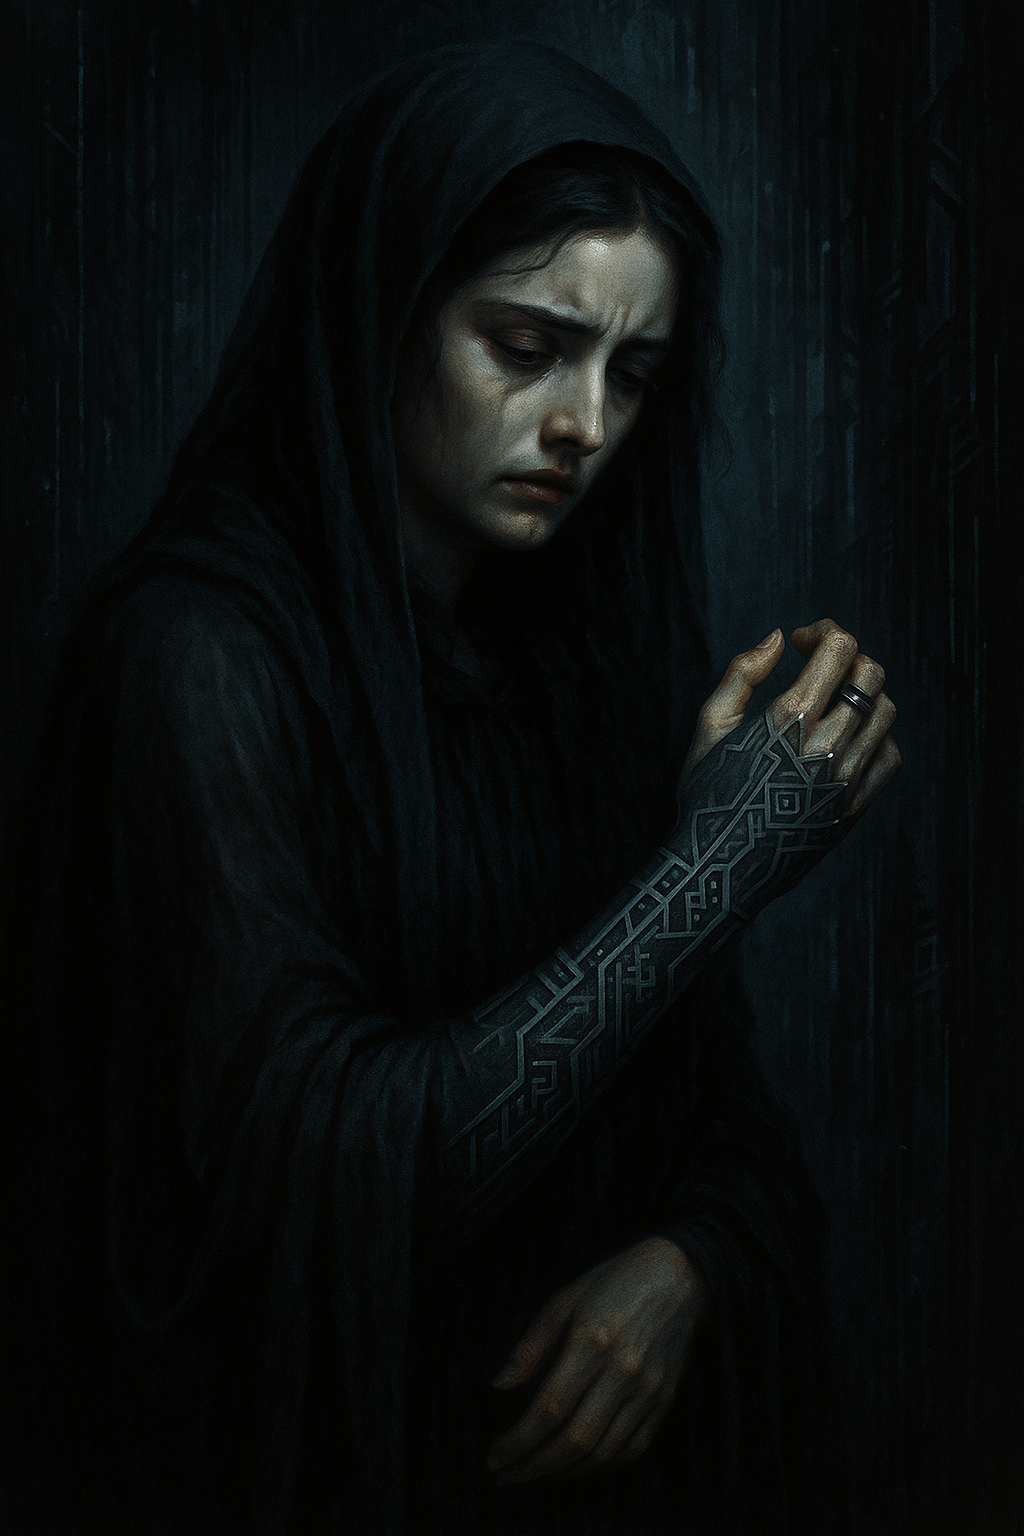

## Appendix 1. Notation and Conventions

We’ll use SI units unless stated otherwise.

- $\vec{E}, \vec{B}$: Electromagnetic fields  
- $\psi$: Wavefunction or field amplitude  
- $k, \omega$: Wavenumber and angular frequency  
- $r$: Radial coordinate from source  
- $\tilde{F}(k)$: Fourier transform of field $F(x)$  
- $L(r)$: Locality measure at distance $r$

Block equations will use `$$...$$` for clarity:

$$
L(r) = \frac{\sum_{n \ge 2} |A_n(r)|^2}{\sum_n |A_n(r)|^2}
$$

## Appendix 2: Symbolic Optimization Notes

### 🧠 Context: Simplifying the Poynting Vector Computation

In Section **4.6.1**, we compute the Poynting vector:

$$
\vec{S} = \frac{1}{\mu_0} \, \text{Re}\left[ \vec{E} \times \vec{B}^* \right]
$$

We initially performed this operation after substituting all symbolic variables ($r$, $\theta$, $\phi$, etc.) with expressions in Cartesian coordinates.

However, this caused **severe symbolic bloat** and slow evaluation, due to:

- Nested trigonometric expressions
- Square roots inside substitution chains
- Symbolic exponentials with composite arguments

### ✅ Optimization Strategy

To improve performance **without compromising correctness**, we:

1. **Deferred substitution** until *after* the cross product:
   - This preserves generality of the vector operations.
2. **Avoided global `simplify()`**, which can be extremely costly.
3. **Used lightweight `.doit()`**, which safely evaluates `Re()` and `conjugate()`:
   - These are deterministic operations, not approximations.

Example block:

```python
E_cross_B = sp.re(E_cartesian_t0).cross(sp.conjugate(B_cartesian))  # all symbolic
S_vector = (1 / mu0_val) * sp.Matrix([c.subs(subs_dict).doit() for c in E_cross_B])
```

🔒 Guarantee of No Loss of Generality
	•	No approximations (e.g., Taylor truncation, series expansion) were used.
	•	All field expressions remain valid across full space.
	•	Full symbolic generality can be recovered by storing:

  ```python
  S_vector_full = (1 / mu0) * sp.re(E_cartesian.cross(sp.conjugate(B_cartesian)))
  ```

  🧬 Takeaway: Symbolic Hygiene Principle

Postpone substitution and avoid global simplification until the last possible step.
This ensures both symbolic transparency and efficient evaluation — a key principle in Macaroni Mechanics.